<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝 분석 프로세스  
① 데이터 확인 - 연속형/범주형/회귀/분류/비지도
  - 독립변수, 종속변수 확인
  - 연속형 vs 범주형 확인
  - 적용 가능한 분석모델 확인(회귀ㆍ분류ㆍ비지도 학습)  

종속변수의 특성이 연속형이라면 회귀분석 적용, 범주형이라면 분류분석 적용, 종속변수가 없다면 비지도학습 적용  
독립변수의 특성이 범주형이라며 이를 분석에 활용하도록 전처리해야함.

② 데이터 분할 - 학습ㆍ검증ㆍ평가세트/교차검증 방법
  - 학습세트 : 60-80%
  - 검증세트 : 10-20%
  - 평가세트 : 10-20%
  - 교차검증방법 적용 가능

데이터 분할을 한 번만 수행하면 머신러닝 분석결과가 데이터 분할에 의존하게 됨.  
이러한 문제를 해결하려면 다수의 학습-검증-평가데이터 세트가 필요함.  
데이터의 크기가 작거나 검증 결과를 일반화하기 위해 교차검증방법을 적용.  

③ 전처리 - 정규화/표준화/결측치 - 이상치 처리
  - 표준화(평균 0, 표준편차 1) 또는 MinMax 정규화
  - 결측치 확인 후 처리
  - 이상치 확인 후 처리

독립변수에 범주형 변수가 있을 경우, 원핫인코딩 방법으로 데이터 변경.  
원핫인코딩은 데이터를 분할하기 전에수행하는것이 좋음.  
변수마다 단위 특성에 차이가 클 때 분석 결과에 영향을 줄 수 있음으로 정규화 또는 표준화를 적용함.
결측치와 이상치가 발견된다면 분석가의 판단과 도메인 상황에 따라 적절한 방법으로 철리해야 한다.
  
④ 모델학습 - 회귀/분류/비지도 하이퍼파라미터 조절
  - 머신러닝 알고리즘 적용
  - 회귀/분류/비지도 학습
  - 최적모델을 결정하기 위해 하이퍼파라미터 탐색ㆍ조절

머신러닝 알고리즘을 학습데이터세트에 적용하는 단계.  
학습데이터세트로 학습을 수행한 뒤, 검증데이터세트로 학습결과를 확인하고 하이퍼파라미터를 적용하는 과정을 거친다.  
다양한 하이퍼파라미터를 적용해봄으로써 최적의 하이퍼파라미터를 탐색해볼 수 있다.  

⑤ 성능평가 - 분석 정확도 확인/알고리즘 성능 제시
  - 평가세트에 최종모델을 적용
  - 평가세트에 대한 정확도를 머심러닝 분석에 대한 성능으로 제시

최적의 하이퍼파라미터 및 최종모델을 결정하는 단계.
최종모델에 평가데이터세트를 적용하여 머신러닝 알고리즘의 예측성능을 평가한다.  
평가데이터세트에 대한 정확도를 머신러닝 분석에 대한 최종성능으로 제시.  
성능평가 단계에서 학습데이터세트와 검증데이터세트를 사용하지 않도록 주의해야함.  
    


## 성능평가 기법

### 회귀분석
#### MAE(Mean Absolute Error)
실젯값과 예측밧의 차이를 절댓값으로 변환해 평균한 것  
  - 에러의 크기가 그대로 반영
  - 이상치에 영향을 받음


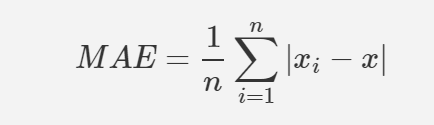

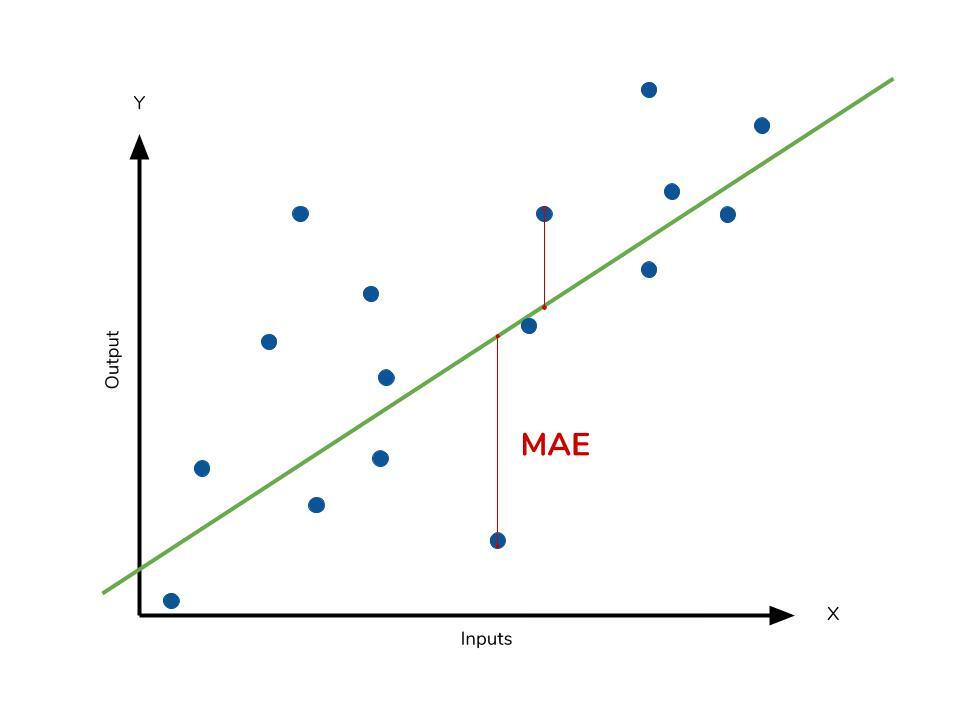

In [ ]:
# sklearn API call
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

#### MSE(Mean Squared Error)
실젯값과 예측값의 차이를 제곱해 평균한 것
  - 실젯값과 예측값 차이의 면적 합을 의미
  - 특이값이 존재하면 수치가 증가

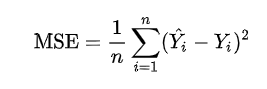

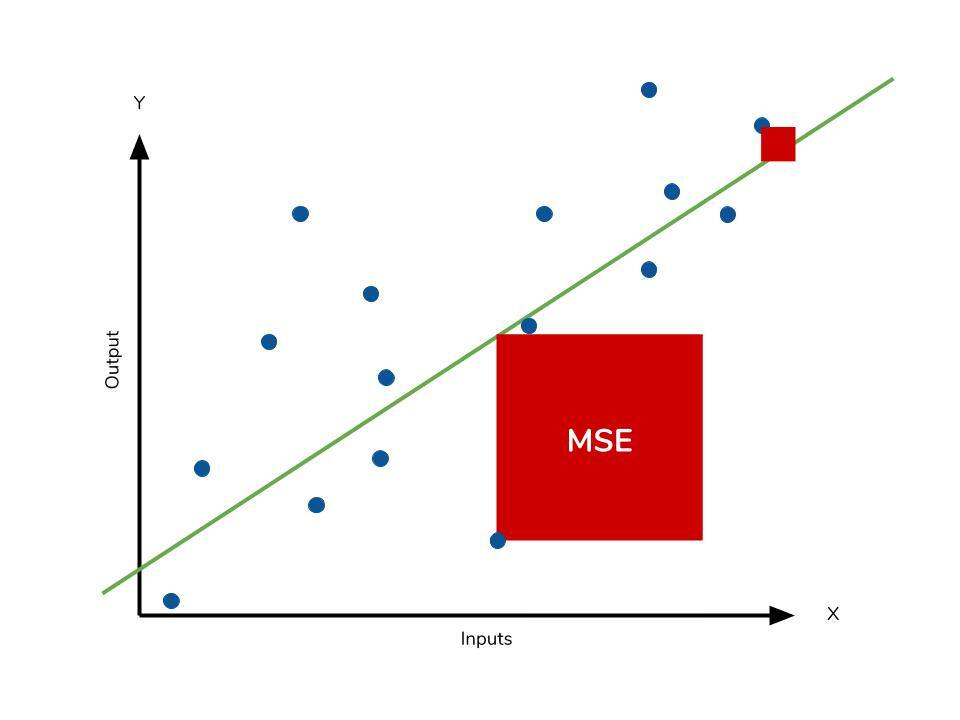

In [ ]:
# sklearn API call
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

#### RMSE(Root Mean Squated Error)
실젯값과 예측값의 차이를 제곱해 평균한 것에 루트를 씌운 것
  - 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
  - 이때, 손실이 기하급수적으로 커지지 않도록 상쇟기 위해 사용

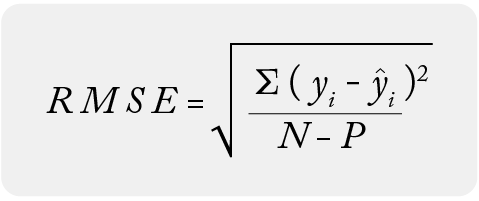

In [ ]:
from sklearn.metrics import mean_squated_error
import numpy as np

mae = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#### MSLE(Mean Squated Log Error)
실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
  - RSME와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위해 사용

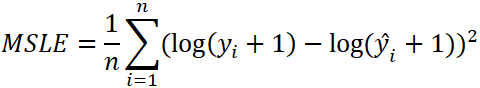

In [ ]:
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(y_test, y_pred)

#### MAPE(Mean Absoulte Percentage Error)
MAE를 퍼센트로 변환한 것
  - 오차가 예측값에서 차지하는 정도를 나타냄

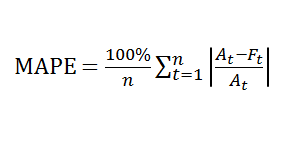

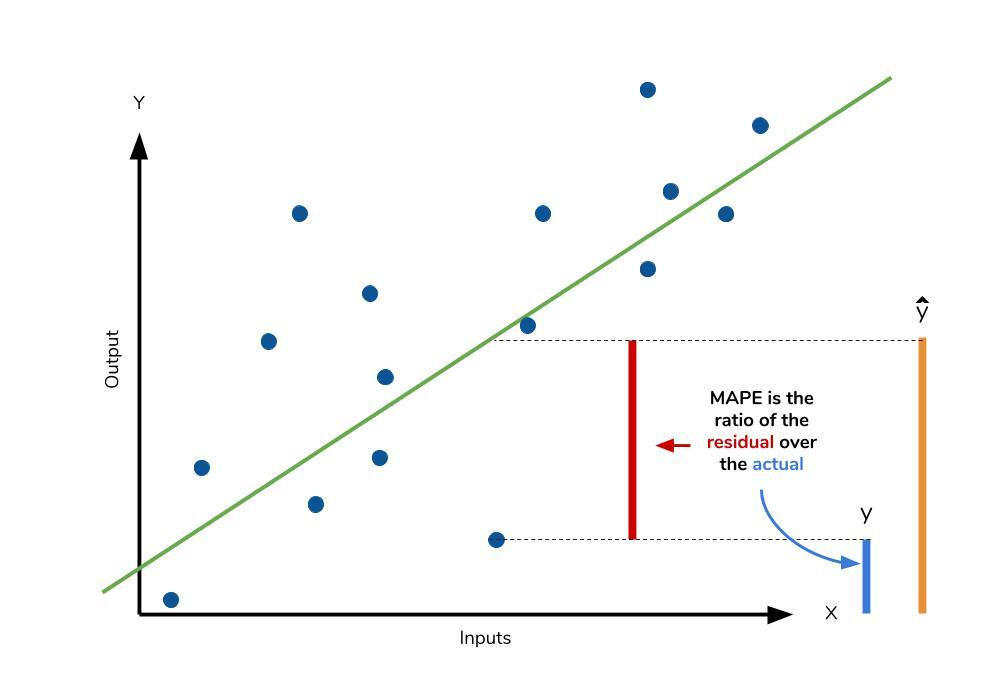

In [ ]:
import numpy as np

def MAPE(y_test, y_pred) :
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  return mape

mape = MAPE(y_test, y_pred)

### 분류분석
#### 정확도(Accuracy)
실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
  - 데이터 구성에 따라 머신러닝 모델의 성능을 왜곡할 가능성이 있음.

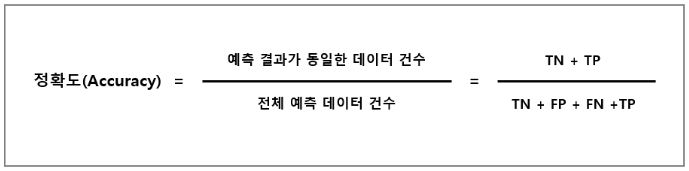

In [ ]:
from sklearn.metrics import accuracy_score

acc = acurracy_score(y_test, y_pred)

#### 혼동행렬(Confusion Matrix)
이진 분류의 예측오류가 얼마이고 어떠한 유형의 예측 오류가 발생하고 있는지 나타내는 지표
  - 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지 나타냄

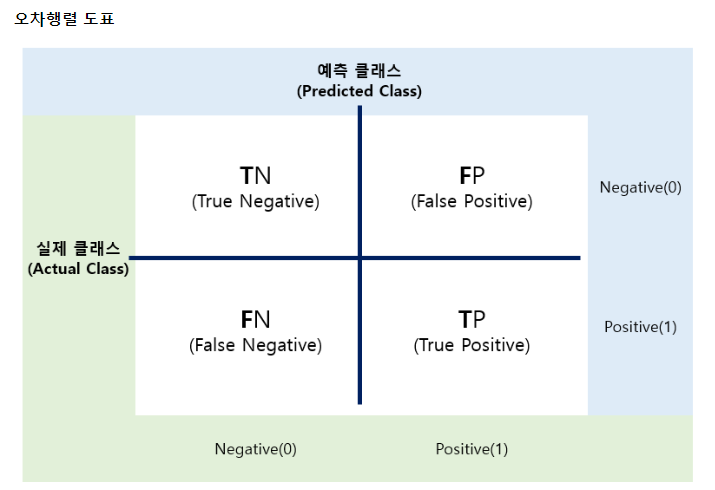

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
array([[218, 0],
       [37,  0]], dtype = int64)